<a href="https://colab.research.google.com/github/haroldgo23/ph-fake-news-detection/blob/main/Fake_news_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fake news Detection

### Import necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
import re
import string

###Import csv files

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Inserting fake and real dataset

In [ ]:
df_fake = pd.read_csv("/content/drive/MyDrive/Fake news detection using python | Data Science Problem with python | Machine Learning | Tutorial 1/Fake.csv")
df_true = pd.read_csv("/content/drive/MyDrive/Fake news detection using python | Data Science Problem with python | Machine Learning | Tutorial 1/True.csv")

In [ ]:
df_fake.head(5)

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
df_true.head(5)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


Inserting a column called "class" for fake and real news dataset to categories fake and true news. 

In [ ]:
df_fake["class"] = 1
df_true["class"] = 0

Removing last 10 rows from both the dataset, for manual testing  

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

In [ ]:
#df_fake_manual_testing = df_fake.tail(10)
#for i in range(23480,23470,-1):
#    df_fake.drop([i], axis = 0, inplace = True)
#df_true_manual_testing = df_true.tail(10)
#for i in range(21416,21406,-1):
#    df_true.drop([i], axis = 0, inplace = True)

In [ ]:
df_fake.shape, df_true.shape

((23481, 5), (21417, 5))

Merging the manual testing dataframe in single dataset and save it in a csv file

In [ ]:
#df_fake_manual_testing["class"] = 0
#df_true_manual_testing["class"] = 1

In [ ]:
#df_fake_manual_testing.head(10)

In [ ]:
#df_true_manual_testing.head(10)

In [ ]:
#df_manual_testing = pd.concat([df_fake_manual_testing,df_true_manual_testing], axis = 0)
#df_manual_testing.to_csv("/content/drive/MyDrive/Fake news detection using python | Data Science Problem with python | Machine Learning | Tutorial 1/manual_testing.csv")

Merging the main fake and true dataframe

In [ ]:
df_merge = pd.concat([df_fake, df_true], axis =0 )
df_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",1
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",1
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",1
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",1
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",1
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",1
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",1
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",1
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",1
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",1


In [ ]:
df_merge.columns

Index(['title', 'text', 'subject', 'date', 'class'], dtype='object')

#### Dropping "title",  "subject" and "date" columns 

In [ ]:
df = df_merge.drop(["title", "subject","date"], axis = 1)
df.head(10)

,text,class
0,Donald Trump just couldn t wish all Americans ...,1
1,House Intelligence Committee Chairman Devin Nu...,1
2,"On Friday, it was revealed that former Milwauk...",1
3,"On Christmas day, Donald Trump announced that ...",1
4,Pope Francis used his annual Christmas Day mes...,1
5,The number of cases of cops brutalizing and ki...,1
6,Donald Trump spent a good portion of his day a...,1
7,In the wake of yet another court decision that...,1
8,Many people have raised the alarm regarding th...,1
9,Just when you might have thought we d get a br...,1


In [ ]:
df.isnull().sum()

text     0
class    0
dtype: int64

#### Randomly shuffling the dataframe 

In [ ]:
df = df.sample(frac = 1)

In [ ]:
df.head()

,text,class
6184,Donald Trump s best efforts to smear Democrati...,1
22326,21st Century Wire says This week s documentary...,1
19057,The grieving daughter in law of Vice President...,1
9949,WASHINGTON (Reuters) - Legislation to help Pue...,0
13439,LONDON (Reuters) - U.S. President Donald Trump...,0


In [ ]:
df.reset_index(inplace = True)
df.drop(["index"], axis = 1, inplace = True)

In [ ]:
df.columns

Index(['text', 'class'], dtype='object')

In [ ]:
df.head()

,text,class
0,Donald Trump s best efforts to smear Democrati...,1
1,21st Century Wire says This week s documentary...,1
2,The grieving daughter in law of Vice President...,1
3,WASHINGTON (Reuters) - Legislation to help Pue...,0
4,LONDON (Reuters) - U.S. President Donald Trump...,0


#### Defining independent and dependent variables as x and y

In [ ]:
x = df["text"]
y = df["class"]
#print(x)

#### Creating a function to convert the text in lowercase, remove the extra space, special chr., ulr and links.

In [ ]:
def wordopt(text):
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub("\\W"," ",text) 
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)    
    return text

In [ ]:
df["text"] = df["text"].apply(wordopt)

#### Splitting the dataset into training set and testing set. 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

#### Convert text to vectors

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorization = TfidfVectorizer()
X = vectorization.fit_transform(x)
xv_train = vectorization.fit_transform(x_train)
xv_test = vectorization.transform(x_test)
print(X)

  (0, 43268)	0.037313053079359275
  (0, 35791)	0.038295106311447134
  (0, 75260)	0.07226448462236042
  (0, 47424)	0.05079608169695156
  (0, 100116)	0.026406563545793862
  (0, 43260)	0.02898809150214978
  (0, 31651)	0.030369444827001883
  (0, 4308)	0.08820549950133001
  (0, 103548)	0.04881553048650624
  (0, 69032)	0.06305404621144836
  (0, 66563)	0.020150725487587236
  (0, 19146)	0.06273296836923263
  (0, 58803)	0.0429818139330017
  (0, 65877)	0.05431963538209404
  (0, 103844)	0.04445873670033346
  (0, 76098)	0.038381415015609814
  (0, 53647)	0.040564538081226426
  (0, 90025)	0.05039871376270142
  (0, 3961)	0.03077708323594872
  (0, 83520)	0.04907283214701329
  (0, 76703)	0.09698174492687886
  (0, 24253)	0.026527707403949174
  (0, 52091)	0.03628161928803211
  (0, 59704)	0.052902825895298634
  (0, 398)	0.018714214002698213
  :	:
  (44897, 62893)	0.07676966275031347
  (44897, 33297)	0.02126866819290921
  (44897, 72908)	0.019752622635981747
  (44897, 45726)	0.0436214124955769
  (44897, 520



```
# This is formatted as code
```

### 1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
LR = LogisticRegression()
LR.fit(xv_train,y_train)

LogisticRegression()

In [ ]:
pred_lr=LR.predict(xv_test)

In [ ]:
LR.score(xv_test, y_test)

0.9880846325167038

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_lr = cross_val_score(LR, X, y,cv=10)
print(score_lr)
print(score_lr.mean())

[0.98953229 0.98797327 0.98396437 0.98619154 0.98507795 0.98819599
 0.98730512 0.98886414 0.9899755  0.98841613]
0.9875496301029838


              precision    recall  f1-score   support

           0       0.98      0.99      0.99      4310
           1       0.99      0.99      0.99      4670

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4269   41]
 [  66 4604]]


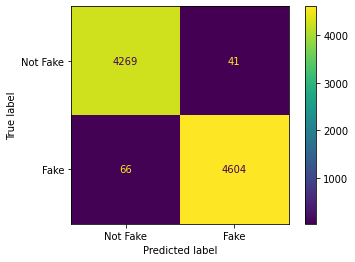

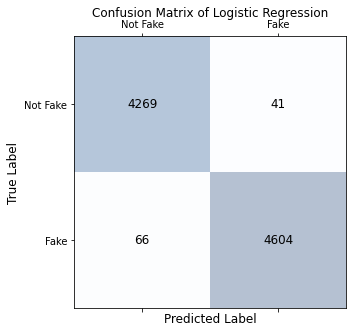

In [ ]:
############# conf matrix/ class report practically useless if cross validated ##################
print(classification_report(y_test, pred_lr))
cm_lr = confusion_matrix(y_test, pred_lr)
print(cm_lr)

cmd_lr = ConfusionMatrixDisplay(cm_lr, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_lr.plot()  

labels = ['Not Fake','Fake']
fig_lr, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_lr, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_lr.shape[0]):
    for j in range(cm_lr.shape[1]):
        ax.text(x=j, y=i,s=cm_lr[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Logistic Regression', fontsize=12)
plt.show()

fig_lr.savefig('conf_lr.pdf', format='pdf', bbox_inches = 'tight')

### 2. Decision Tree Classification

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
DT = DecisionTreeClassifier()
DT.fit(xv_train, y_train)

DecisionTreeClassifier()

In [ ]:
pred_dt = DT.predict(xv_test)

In [ ]:
DT.score(xv_test, y_test)

0.9948775055679288

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_dt = cross_val_score(DT, X, y,cv=10)
print(score_dt)
print(score_dt.mean())

[0.99665924 0.99554566 0.99755011 0.99665924 0.99755011 0.99576837
 0.99576837 0.99465479 0.9966585  0.9959902 ]
0.996280459881889


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      4310
           1       1.00      1.00      1.00      4670

    accuracy                           1.00      8980
   macro avg       1.00      1.00      1.00      8980
weighted avg       1.00      1.00      1.00      8980

[[4294   16]
 [  21 4649]]


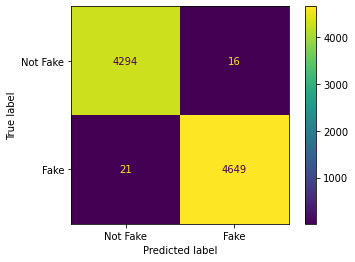

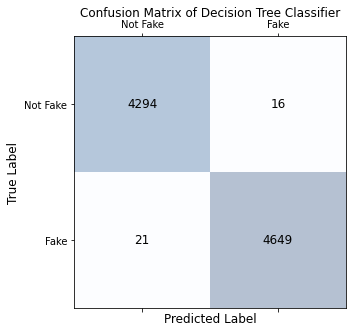

In [ ]:
print(classification_report(y_test, pred_dt))
cm_dt = confusion_matrix(y_test, pred_dt)
print(cm_dt)

cmd_dt = ConfusionMatrixDisplay(cm_dt, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_dt.plot()  

labels = ['Not Fake','Fake']
fig_dt, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_dt, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_dt.shape[0]):
    for j in range(cm_dt.shape[1]):
        ax.text(x=j, y=i,s=cm_dt[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Decision Tree Classifier', fontsize=12)
plt.show()

fig_dt.savefig('conf_dt.pdf', format='pdf', bbox_inches = 'tight')

### 3. Gradient Boosting Classifier

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
GBC = GradientBoostingClassifier(random_state=0)

In [ ]:
GBC.fit(xv_train, y_train)

GradientBoostingClassifier(random_state=0)

In [ ]:
pred_gbc = GBC.predict(xv_test)

In [ ]:
GBC.score(xv_test, y_test)

0.9955456570155902

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_gbc = cross_val_score(GBC, X, y,cv=10)
print(score_gbc)
print(score_gbc.mean())

[0.99554566 0.99554566 0.99532294 0.99665924 0.99398664 0.99688196
 0.99554566 0.99465479 0.99509913 0.99487636]
0.995411803463155


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4310
           1       1.00      0.99      1.00      4670

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4297   13]
 [  33 4637]]


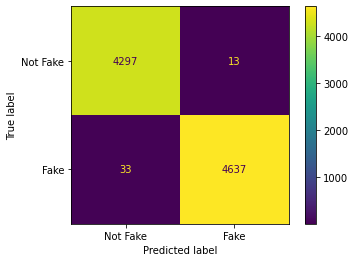

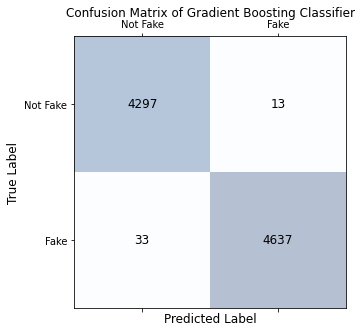

In [ ]:
print(classification_report(y_test, pred_gbc))
cm_gbc = confusion_matrix(y_test, pred_gbc)
print(cm_gbc)

cmd_gbc = ConfusionMatrixDisplay(cm_gbc, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_gbc.plot()  

labels = ['Not Fake','Fake']
fig_gb, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_gbc, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_gbc.shape[0]):
    for j in range(cm_gbc.shape[1]):
        ax.text(x=j, y=i,s=cm_gbc[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Gradient Boosting Classifier', fontsize=12)
plt.show()

fig_gb.savefig('conf_gb.pdf', format='pdf', bbox_inches = 'tight')

### 4. Random Forest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier
RFC = RandomForestClassifier()

In [ ]:
RFC.fit(xv_train, y_train)

RandomForestClassifier()

In [ ]:
pred_rfc = RFC.predict(xv_test)

In [ ]:
RFC.score(xv_test, y_test)

0.9898663697104677

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_rfc = cross_val_score(RFC, X, y,cv=10)
print(score_rfc)
print(score_rfc.mean())

[0.99109131 0.98908686 0.98953229 0.98997773 0.98997773 0.99042316
 0.99064588 0.99265033 0.98908443 0.99175763]
0.9904227359033044


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4310
           1       1.00      0.99      0.99      4670

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4289   21]
 [  41 4629]]


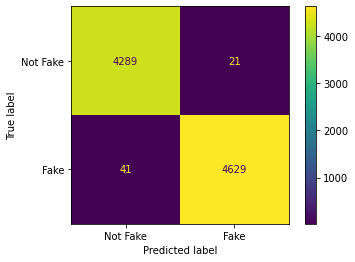

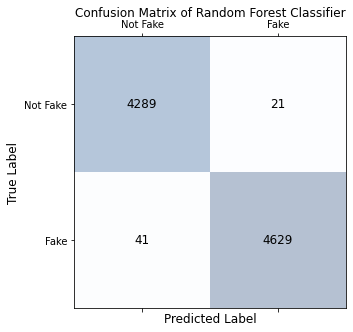

In [ ]:
print(classification_report(y_test, pred_rfc))
cm_rfc = confusion_matrix(y_test, pred_rfc)
print(cm_rfc)

cmd_rfc = ConfusionMatrixDisplay(cm_rfc, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_rfc.plot()  

labels = ['Not Fake','Fake']
fig_rf, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_rfc, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_rfc.shape[0]):
    for j in range(cm_rfc.shape[1]):
        ax.text(x=j, y=i,s=cm_rfc[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Random Forest Classifier', fontsize=12)
plt.show()

fig_rf.savefig('conf_rf.pdf', format='pdf', bbox_inches = 'tight')

### 5. Passive-Aggresive Classifier

In [ ]:
from sklearn.linear_model import PassiveAggressiveClassifier
pac = PassiveAggressiveClassifier(max_iter=50)

In [ ]:
pac.fit(xv_train, y_train)

PassiveAggressiveClassifier(max_iter=50)

In [ ]:
pred_pac = pac.predict(xv_test)

In [ ]:
pac.score(xv_test, y_test)

0.99543429844098

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_pac = cross_val_score(pac, X, y,cv=10)
print(score_pac)
print(score_pac.mean())

[0.99532294 0.99599109 0.99420935 0.99554566 0.99487751 0.99576837
 0.99576837 0.99576837 0.99643573 0.9959902 ]
0.9955677600429855


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4310
           1       1.00      0.99      0.99      4670

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4294   16]
 [  31 4639]]


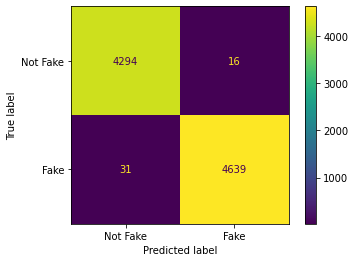

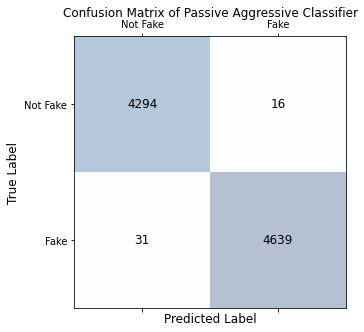

In [ ]:
print(classification_report(y_test, pred_pac))
cm_pac = confusion_matrix(y_test, pred_pac)
print(cm_pac)

cmd_pac = ConfusionMatrixDisplay(cm_pac, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_pac.plot()  

labels = ['Not Fake','Fake']
fig_pac, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_pac, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_pac.shape[0]):
    for j in range(cm_pac.shape[1]):
        ax.text(x=j, y=i,s=cm_pac[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Passive Aggressive Classifier', fontsize=12)
plt.show()

fig_pac.savefig('conf_pac.pdf', format='pdf', bbox_inches = 'tight')

### 6. Naive Bayes

In [ ]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()

In [ ]:
mnb.fit(xv_train, y_train)

MultinomialNB()

In [ ]:
pred_mnb = mnb.predict(xv_test)

In [ ]:
mnb.score(xv_test, y_test)

0.9364142538975501

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_nb = cross_val_score(mnb, X, y,cv=10)
print(score_nb)
print(score_nb.mean())

[0.93719376 0.93942094 0.93184855 0.94342984 0.93585746 0.94008909
 0.93140312 0.93875278 0.93584317 0.93339274]
0.9367231455659244


              precision    recall  f1-score   support

           0       0.94      0.93      0.94      4310
           1       0.94      0.95      0.94      4670

    accuracy                           0.94      8980
   macro avg       0.94      0.94      0.94      8980
weighted avg       0.94      0.94      0.94      8980

[[4021  289]
 [ 241 4429]]


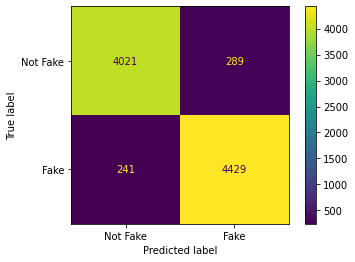

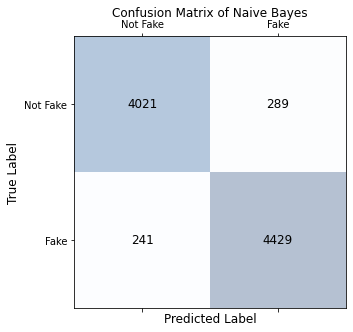

In [ ]:
print(classification_report(y_test, pred_mnb))
cm_mnb = confusion_matrix(y_test, pred_mnb)
print(cm_mnb)

cmd_mnb = ConfusionMatrixDisplay(cm_mnb, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_mnb.plot()  

labels = ['Not Fake','Fake']
fig_nb, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_mnb, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_mnb.shape[0]):
    for j in range(cm_mnb.shape[1]):
        ax.text(x=j, y=i,s=cm_mnb[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Naive Bayes', fontsize=12)
plt.show()

fig_nb.savefig('conf_nb.pdf', format='pdf', bbox_inches = 'tight')

### Support Vector Machine

In [ ]:
from sklearn import svm
svm = svm.SVC(kernel='linear', probability=True) # Linear Kernel

In [ ]:
svm.fit(xv_train, y_train)

SVC(kernel='linear', probability=True)

In [ ]:
pred_svm = svm.predict(xv_test)

In [ ]:
svm.score(xv_test, y_test)

0.9943207126948775

In [ ]:
# cross validation
from sklearn.model_selection import cross_val_score
score_svm = cross_val_score(svm, X, y,cv=10)
print(score_svm)
print(score_svm.mean())

[0.99532294 0.99465479 0.99309577 0.99487751 0.99309577 0.99532294
 0.99420935 0.99510022 0.99554466 0.9939853 ]
0.9945209249434772


              precision    recall  f1-score   support

           0       0.99      1.00      0.99      4310
           1       1.00      0.99      0.99      4670

    accuracy                           0.99      8980
   macro avg       0.99      0.99      0.99      8980
weighted avg       0.99      0.99      0.99      8980

[[4293   17]
 [  30 4640]]


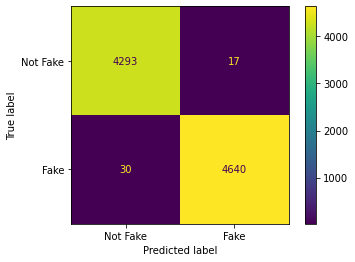

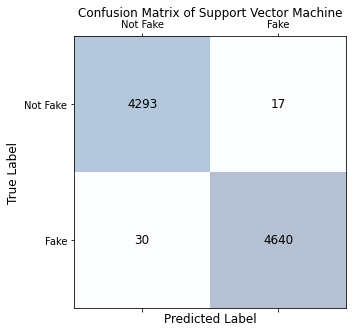

In [ ]:
print(classification_report(y_test, pred_svm))
cm_svm = confusion_matrix(y_test, pred_svm)
print(cm_svm)

cmd_svm = ConfusionMatrixDisplay(cm_svm, display_labels=['Not Fake','Fake']) # 0 - not fake, 1 - fake
cmd_svm.plot()  

labels = ['Not Fake','Fake']
fig_svm, ax = plt.subplots(figsize=(5, 5))
ax.matshow(cm_svm, cmap=plt.cm.Blues, alpha=0.3)
for i in range(cm_svm.shape[0]):
    for j in range(cm_svm.shape[1]):
        ax.text(x=j, y=i,s=cm_svm[i, j], va='center', ha='center', size='large')
 
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Label', fontsize=12)
plt.ylabel('True Label', fontsize=12)
plt.title('Confusion Matrix of Support Vector Machine', fontsize=12)
plt.show()

fig_svm.savefig('conf_svm.pdf', format='pdf', bbox_inches = 'tight')

# ROC / AUC 

In [ ]:
lr_probs = LR.predict_proba(xv_test)
dt_probs = DT.predict_proba(xv_test)
gb_probs = GBC.predict_proba(xv_test)
rf_probs = RFC.predict_proba(xv_test)
#pac_probs = pac.predict_proba(xv_test)
nb_probs = mnb.predict_proba(xv_test)
svm_probs = svm.predict_proba(xv_test)

In [ ]:
# getting probabilities for the positive outcome
lr_probs = lr_probs[:, 1]
dt_probs = dt_probs[:, 1]
gb_probs = gb_probs[:, 1]
rf_probs = rf_probs[:, 1]
#pac_probs = pac_probs[:, 1]
nb_probs = nb_probs[:, 1]
svm_probs = svm_probs[:, 1]

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score
lr_auc = roc_auc_score(y_test, lr_probs)
dt_auc = roc_auc_score(y_test, dt_probs)
gb_auc = roc_auc_score(y_test, gb_probs)
rf_auc = roc_auc_score(y_test, rf_probs)
#pac_auc = roc_auc_score(y_test, pac_probs)
nb_auc = roc_auc_score(y_test, nb_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

In [ ]:
print('LR: AUC = %.3f' % (lr_auc))
print('DTC: AUC = %.3f' % (dt_auc))
print('GBC: AUC = %.3f' % (gb_auc))
print('RF: AUC = %.3f' % (rf_auc))
#print('LR: AUC = %.3f' % (pac_auc))
print('NB: AUC = %.3f' % (nb_auc))
print('SVM: AUC = %.3f' % (svm_auc))

LR: AUC = 0.999
DTC: AUC = 0.995
GBC: AUC = 0.999
RF: AUC = 0.999
NB: AUC = 0.982
SVM: AUC = 1.000


In [ ]:
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
#pac_fpr, pac_tpr, _ = roc_curve(y_test, pac_probs)
nb_fpr, nb_tpr, _ = roc_curve(y_test, nb_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)

### Plot the curves

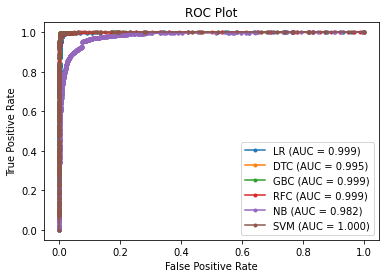

In [ ]:
roc_plot = plt.figure()
plt.plot(lr_fpr, lr_tpr, marker='.', label='LR (AUC = %0.3f)' % lr_auc)
plt.plot(dt_fpr, dt_tpr, marker='.', label='DTC (AUC = %0.3f)' % dt_auc)
plt.plot(gb_fpr, gb_tpr, marker='.', label='GBC (AUC = %0.3f)' % gb_auc)
plt.plot(rf_fpr, rf_tpr, marker='.', label='RFC (AUC = %0.3f)' % rf_auc)
#plt.plot(pac_fpr, pac_tpr, marker='.', label='PAC (AUC = %0.3f)' % pac_auc)
plt.plot(nb_fpr, nb_tpr, marker='.', label='NB (AUC = %0.3f)' % nb_auc)
plt.plot(svm_fpr, svm_tpr, marker='.', label='SVM (AUC = %0.3f)' % svm_auc)

# Title
plt.title('ROC Plot')
# Axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# Show legend
plt.legend()  
# Show plot
plt.show()

roc_plot.savefig('roc.pdf', format='pdf', bbox_inches = 'tight')

# Model Testing With Manual Entry

### News

In [ ]:
def output_lable(n):
    if n == 0:
        return "not Fake news"
    elif n == 1:
        return "Fake News"
    
def manual_testing(news):
    testing_news = {"text":[news]}
    new_def_test = pd.DataFrame(testing_news)
    new_def_test["text"] = new_def_test["text"].apply(wordopt) 
    new_x_test = new_def_test["text"]
    new_xv_test = vectorization.transform(new_x_test)
    pred_LR = LR.predict(new_xv_test)
    pred_DT = DT.predict(new_xv_test)
    pred_GBC = GBC.predict(new_xv_test)
    pred_RFC = RFC.predict(new_xv_test)
    pred_pac = pac.predict(new_xv_test)
    pred_mnb = mnb.predict(new_xv_test)
    pred_svm = svm.predict(new_xv_test)

    return print("\n\nLR Prediction: {} \nDT Prediction: {} \nGBC Prediction: {} \nRFC Prediction: {} \nPAC Prediction: {} \nMNB Prediction: {} \nSVM Prediction: {}".format(output_lable(pred_LR[0]), 
                                                                                                                                                                            output_lable(pred_DT[0]), 
                                                                                                                                                                            output_lable(pred_GBC[0]), 
                                                                                                                                                                            output_lable(pred_RFC[0]),
                                                                                                                                                                            output_lable(pred_pac[0]),
                                                                                                                                                                            output_lable(pred_mnb[0]),
                                                                                                                                                                            output_lable(pred_svm[0])))

In [ ]:
news = str(input())
manual_testing(news)

h


LR Prediction: Fake News 
DT Prediction: Fake News 
GBC Prediction: Fake News 
RFC Prediction: Fake News 
PAC Prediction: Fake News 
MNB Prediction: Fake News 
SVM Prediction: Fake News
